In [1]:
import numpy as np
import pandas as pd
import pickle as pl
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

In [9]:
path = "unprotected/ml-100k"
methods = ["userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]

Ks = np.load("results/" + path + "/K.npy")

neighborhood_size_q = dict()
item_coverage_q = dict()
rating_overlap_q = dict()
mean_absolute_error_q = dict()
for m in methods:
    neighborhood_size_q[m] = np.load("results/" + path + "/neighborhood_size_q_" + m + ".npy")
    item_coverage_q[m] = np.load("results/" + path + "/item_coverage_q_" + m + ".npy")
    rating_overlap_q[m] = np.load("results/" + path + "/rating_overlap_q_" + m + ".npy")
    mean_absolute_error_q[m] = np.load("results/" + path + "/mae_q_" + m + ".npy")

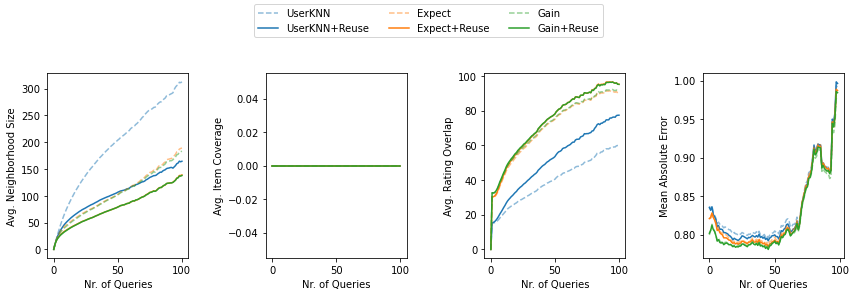

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].plot(range(101), neighborhood_size_q["userknn"][1], c="C0", linestyle="dashed", alpha=0.5)
axes[0].plot(range(101), neighborhood_size_q["userknn_reuse"][1], c="C0")
axes[0].plot(range(101), neighborhood_size_q["expect"][1], c="C1", linestyle="dashed", alpha=0.5)
axes[0].plot(range(101), neighborhood_size_q["expect_reuse"][1], c="C1")
axes[0].plot(range(101), neighborhood_size_q["gain"][1], c="C2", linestyle="dashed", alpha=0.5)
axes[0].plot(range(101), neighborhood_size_q["gain_reuse"][1], c="C2")
axes[0].set_ylabel("Avg. Neighborhood Size")
axes[0].set_xlabel("Nr. of Queries")

axes[1].plot(range(101), item_coverage_q["userknn"][1], c="C0", linestyle="dashed", alpha=0.5)
axes[1].plot(range(101), item_coverage_q["userknn_reuse"][1], c="C0")
axes[1].plot(range(101), item_coverage_q["expect"][1], c="C1", linestyle="dashed", alpha=0.5)
axes[1].plot(range(101), item_coverage_q["expect_reuse"][1], c="C1")
axes[1].plot(range(101), item_coverage_q["gain"][1], c="C2", linestyle="dashed", alpha=0.5)
axes[1].plot(range(101), item_coverage_q["gain_reuse"][1], c="C2")
axes[1].set_ylabel("Avg. Item Coverage")
axes[1].set_xlabel("Nr. of Queries")

axes[2].plot(range(101), rating_overlap_q["userknn"][1], c="C0", linestyle="dashed", alpha=0.5)
axes[2].plot(range(101), rating_overlap_q["userknn_reuse"][1], c="C0")
axes[2].plot(range(101), rating_overlap_q["expect"][1], c="C1", linestyle="dashed", alpha=0.5)
axes[2].plot(range(101), rating_overlap_q["expect_reuse"][1], c="C1")
axes[2].plot(range(101), rating_overlap_q["gain"][1], c="C2", linestyle="dashed", alpha=0.5)
axes[2].plot(range(101), rating_overlap_q["gain_reuse"][1], c="C2")
axes[2].set_ylabel("Avg. Rating Overlap")
axes[2].set_xlabel("Nr. of Queries")

axes[3].plot(range(99), mean_absolute_error_q["userknn"][1][2:], c="C0", linestyle="dashed", alpha=0.5)
axes[3].plot(range(99), mean_absolute_error_q["userknn_reuse"][1][2:], c="C0")
axes[3].plot(range(99), mean_absolute_error_q["expect"][1][2:], c="C1", linestyle="dashed", alpha=0.5)
axes[3].plot(range(99), mean_absolute_error_q["expect_reuse"][1][2:], c="C1")
axes[3].plot(range(99), mean_absolute_error_q["gain"][1][2:], c="C2", linestyle="dashed", alpha=0.5)
axes[3].plot(range(99), mean_absolute_error_q["gain_reuse"][1][2:], c="C2")
axes[3].set_ylabel("Mean Absolute Error")
axes[3].set_xlabel("Nr. of Queries")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.11, hspace=0.35, wspace=0.55)
fig.align_ylabels(axes)